In [2]:
# Udacity course DataScience
# Project I "How to breakt into the field?"
# Analysis on Seattle AirBnB data

# Import needed libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load Airbnb data into dataframe
df_calendar = pd.read_csv('./Seattle/calendar.csv')
df_listings = pd.read_csv('./Seattle/listings.csv')
df_reviews = pd.read_csv('./Seattle/reviews.csv')

# Show head to get a feeling of the data
df_calendar.head()
#df_listings.head()
#df_reviews.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# Price column contains NaN values for unavailable listings. Fill them with 0.
df_calendar['price'].fillna(0, inplace=True)
# Date column is a string value. Convert them to Python datetime for easy access via dt
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
# Create new columns for year, month, day
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['day'] = df_calendar['date'].dt.day
# Remove "$" from price column and convert it to float
df_calendar['price'].replace('\$|,','', regex=True, inplace=True)
df_calendar['price'] = df_calendar['price'].astype('float')

# Filter only for available listings
df_available_listings = df_calendar[df_calendar['available'] == 't']

#Calculate avg price per month for available listings
arr_avg_price_month = []
for month in range(1,13):
    arr_avg_price_month.append(df_available_listings[df_available_listings['month'] == month]['price'].mean())
print(arr_avg_price_month)

[122.91217641714277, 124.29392670585507, 128.64448759798898, 135.09700540526322, 139.5381825911893, 147.47313707213505, 152.09414998248496, 150.65659423422008, 143.25594852807913, 137.03193915427352, 135.6887380777696, 137.2518349203432]


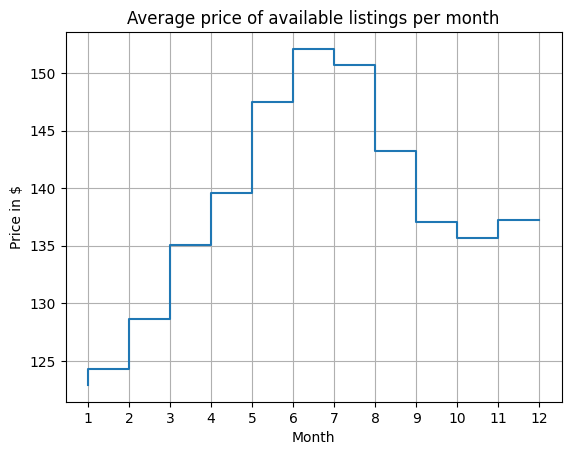

In [4]:
# Plot data to answer Question Nr. 1
plt.step(range(1,1+len(arr_avg_price_month)), arr_avg_price_month, label='Average price')
plt.xlabel('Month')
ax = plt.subplot()
ax.set_xticks(range(1,1+len(arr_avg_price_month)))
plt.grid()
plt.ylabel('Price in $')
plt.title('Average price of available listings per month')
plt.show()

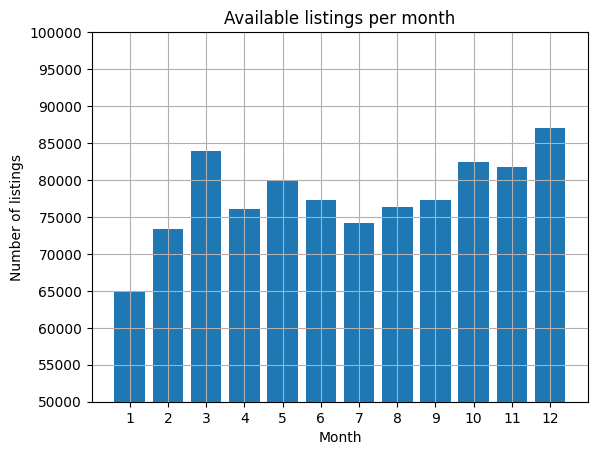

In [5]:
# Plot available listings over month
plt.bar(df_available_listings['month'].value_counts().index, df_available_listings['month'].value_counts(), label='Available listings')
plt.xlabel('Month')
plt.ylim(50000, 100000)
ax = plt.subplot()
ax.set_xticks(range(1,1+len(df_available_listings['month'].value_counts().index)))
ax.set_yticks(range(50000, 105000, 5000))
plt.grid()
plt.plot()
plt.ylabel('Number of listings')
plt.title('Available listings per month')
plt.show()